# 5D CornerPlot



In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [2]:
def quantile(x, q, weights=None):
    """
    Compute sample quantiles with support for weighted samples.
    Note
    ----
    When ``weights`` is ``None``, this method simply calls numpy's percentile
    function with the values of ``q`` multiplied by 100.
    Parameters
    ----------
    x : array_like[nsamples,]
       The samples.
    q : array_like[nquantiles,]
       The list of quantiles to compute. These should all be in the range
       ``[0, 1]``.
    weights : Optional[array_like[nsamples,]]
        An optional weight corresponding to each sample. These
    Returns
    -------
    quantiles : array_like[nquantiles,]
        The sample quantiles computed at ``q``.
    Raises
    ------
    ValueError
        For invalid quantiles; ``q`` not in ``[0, 1]`` or dimension mismatch
        between ``x`` and ``weights``.
    """
    x = np.atleast_1d(x)
    q = np.atleast_1d(q)

    if np.any(q < 0.0) or np.any(q > 1.0):
        raise ValueError("Quantiles must be between 0 and 1")

    if weights is None:
        return np.percentile(x, list(100.0 * q))
    else:
        weights = np.atleast_1d(weights)
        if len(x) != len(weights):
            raise ValueError("Dimension mismatch: len(weights) != len(x)")
        idx = np.argsort(x)
        sw = weights[idx]
        cdf = np.cumsum(sw)[:-1]
        cdf /= cdf[-1]
        cdf = np.append(0, cdf)
        return np.interp(q, cdf, x[idx]).tolist()


In [3]:
def mostprob_func(data,ndim):
    prob=[]

    
    for i in range (0,ndim):
        kernel = stats.kde.gaussian_kde(data[:,i])
        x = np.linspace(min(data[:,i]), max(data[:,i]), 100000)
        nparam_density = kernel(x)
        value=x[np.argmax(nparam_density)]
        prob.append(value)
        print(value)
    return prob

In [4]:
SFH_list=[]
alpha1_list=[]
alpha2_list=[]
alpha3_list=[]
Hr1_list=[]
Hr2_list=[]

with open('abc_mpi.txt') as ABCresults: # Reading the simulation variables

    for line in ABCresults:
        if not line.startswith("param"): 
            VariableS =line.split()
            SFH=float(VariableS[0])  # Assigning the variable X
            a1=float(VariableS[1])
            a2=float(VariableS[2])
            a3=float(VariableS[3])
            h1=float(VariableS[4])
            
            
           
            SFH_list.append(SFH)
            alpha1_list.append(a1)
            alpha2_list.append(a2)
            alpha3_list.append(a3)
            Hr1_list.append(h1)
         
            
            
dimension=1600

sfh=np.array(SFH_list).reshape(dimension)
alpha1=np.array(alpha1_list).reshape(dimension)
alpha2=np.array(alpha2_list).reshape(dimension)
alpha3=np.array(alpha3_list).reshape(dimension)
Hr1=np.array(Hr1_list).reshape(dimension)

            
tot=list(zip(sfh,alpha1,alpha2,alpha3,Hr1))


data=np.matrix(tot)
len(data)


1600

In [5]:
print(data[0])

[[ 46.57312   10.274706   0.904801  54.189078 333.010093]]


In [6]:
import numpy as np
from matplotlib import rcParams

import corner



#np.random.seed(42)

# Set up the parameters of the problem.
ndim, nsamples =5 ,1600
# Generate some fake data.
#data1 = np.random.randn(ndim * 4 * nsamples / 5).reshape([4 * nsamples / 5,
#                                                          ndim])
#data2 = (4 * np.random.rand(ndim)[None, :] +
#         np.random.randn(ndim * nsamples / 5).reshape([nsamples / 5, ndim]))
#data = np.vstack([data1, data2])
data=np.array(tot).reshape([nsamples,ndim])

In [7]:
mostprob=mostprob_func(data,ndim)



50.205528815558154
36.85808778635786
0.460556103701037
118.97290584393843
271.14850328977286


In [8]:
print(mostprob)

[50.205528815558154, 36.85808778635786, 0.460556103701037, 118.97290584393843, 271.14850328977286]


In [37]:
q_50_list=[]
q_16list=[]
q_84list=[]
title_fmt=["0.0f","0.0f","0.1f","0.0f","0.0f"]
labels=[r"$dist=$", r"inc_lmc=", r"ell_f=",r"p_lmc=",r"p_disk="]
title_list=[]
for i in range (0,ndim):
    q_16, q_84,q_50 = quantile(data[:,i], [0.16,  0.84,0.5])
    #print(q_16)
    #q_50=mostprob[i]
    q_m, q_p = q_50-q_16, q_84-q_50

    #q_50=mostprob[i]

           # Format the quantile display.
    fmt = "{{0:{0}}}".format(title_fmt[i]).format
    title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
    q_50_list.append(q_50)
    q_16list.append(q_16)
    q_84list.append(q_84)
    title = labels[i]+title.format(fmt(q_50), fmt(q_m), fmt(q_p))
    title_list.append(title)
    
print(title_list)

['$dist=$${50}_{-0}^{+6}$', 'inc_lmc=${37}_{-11}^{+3}$', 'ell_f=${0.6}_{-0.2}^{+1.2}$', 'p_lmc=${119}_{-30}^{+10}$', 'p_disk=${271}_{-38}^{+23}$']


In [38]:
rcParams["font.size"] = 14.5
rcParams["text.color"] = "blue"
#rcParams["font.sans-serif"] = ["Computer Modern Sans"]
#rcParams["text.usetex"] = True
#rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

In [39]:
print(len(data[:,1]))

1600


In [40]:
print(q_16, q_84)

233.23951336 293.69470304


In [41]:
data3=data

In [42]:
print(q_50_list)

[50.044574, 37.019330999999994, 0.5548820000000001, 118.628609, 270.817898]


/home/hpc/calixto/rmor/anaconda3/lib/python3.7/site-packages/corner/corner.py:240: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  range=np.sort(range[i]), **hist_kwargs)
/home/hpc/calixto/rmor/anaconda3/lib/python3.7/site-packages/corner/corner.py:240: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  range=np.sort(range[i]), **hist_kwargs)
/home/hpc/calixto/rmor/anaconda3/lib/python3.7/site-packages/corner/corner.py:240: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  range=np.sort(range[i]), **hist_kwargs)
/home/hpc/calixto/rmor/anaconda3/lib/python3.7/site-packages/corner/corner.py:240: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  rang

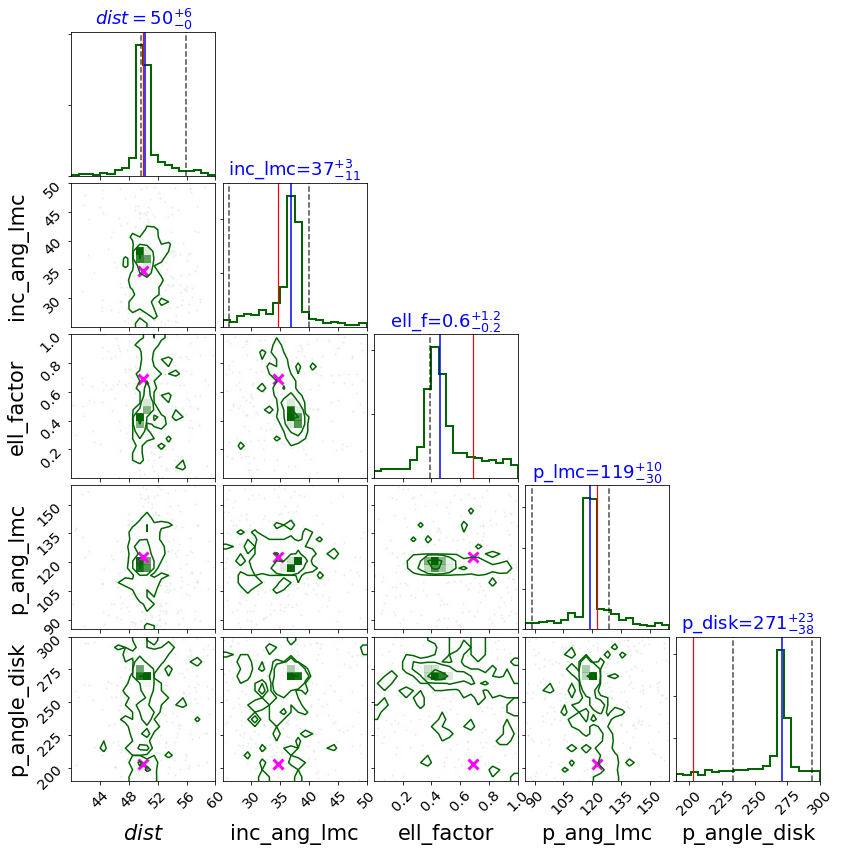

In [48]:
# Plot it.
ndim=5
#ranges=[(0.08, 0.20),(-0.5,2.0),(1.0,3.0),(2.0,4.5),(1200,3600),(0.028,0.045)]

ranges=[(40, 60),(25,50),(0.0,1.0),(85,160),(190,300)]
format="0.3f"
#modevalue1 = stats.mode(data, axis=0)[0]
#modevalue=modevalue1[0]
#print(modevalue)
#meanvalue=np.mean(data, axis=0)
#mostprobable=[0.089,0.0592,2.23,3.743,2286,0.0395]



figure = corner.corner(data3, title_fmt=format,range=ranges,labels=[r"$dist$", r"inc_ang_lmc", r"ell_factor",
                                     r"p_ang_lmc",r"p_angle_disk"],label_kwargs={"fontsize": 21},                       
                       show_titles=True, title_kwargs={"fontsize": 16},color='darkgreen',verbose=True,hist_kwargs={"normed":True,"linewidth":2})
title_fmt=format


#labels=[r"$\gamma=$"+str(format((mostprob))), r"$\alpha_1$", r"$\alpha_2$",r"$\alpha_3$",r"$h_r$",r"$\rho_\odot$"]
#title=

axes = np.array(figure.axes).reshape((ndim, ndim))

#q_16list=[0.12,0.3,1.7,2.7,1904,0.034]
#q_84list=[0.17,1.1,2.2,3.1,2572,0.041]
motherx=[50,34.7,0.688,122.5,202.7]
mothery=[50,34.7,0.688,122.5,202.7]
# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    #ax.hist(data2[:,i],color="orange",histtype='step',range=ranges[i],bins=20,lw=2,normed=True)
    ax.axvline(q_16list[i], color="black",linestyle="dashed",alpha=0.7,lw=1.5)
    ax.axvline(q_84list[i], color="black",linestyle="dashed",alpha=0.7,lw=1.5)
    #ax.plot(x[i],nparam_density[i],color='blue')
    
    ax.axvline(motherx[i], color="red",lw=1.2)
    ax.axvline(mostprob[i], color="b",lw=1.5)
 
    ax.set_title(title_list[i], fontsize= 18)    
    

    
    
for t in range(1,5):
    for tj in range (0,t):
    
        ax2=axes[t,tj]

        ax2.scatter(motherx[tj],mothery[t],marker='x',s=100.,color='magenta',lw=3)
        
        #coef,pvalue=stats.pearsonr(datacoef[:,tj],datacoef[:,t])
        #ax2.text(float(coef),0.9,0.9)
        #ax2.text(0.85, 0.92,str(round(float(coef), 2)), ha='center', va='center', transform=ax2.transAxes,color="black",fontweight='bold')
        #print(float(coef))
 
plt.show()